In [23]:
# Topic modeling using LDA

In [24]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint
import pyLDAvis.gensim


In [25]:
# Importing data
df = pd.read_csv('Reviews_Description.csv')

In [26]:
# Dropping null values
df.dropna(inplace=True)


In [27]:
# shape
print(df.shape)

(1354, 1)


In [28]:
df.head()


,Description_proc
0,warranti month vendor doesnt provid invoic
1,good laptop offic work
2,laptop doesnt come oper system window pro adve...
3,need know whether devic new import
4,havent bought anyth yet


In [29]:
# Creating a list of tokenized words
tokenized_words = []
for i in df['Description_proc']:
    tokenized_words.append(i.split())

In [30]:
# Creating a dictionary of words
dictionary = corpora.Dictionary(tokenized_words) 
# view dictionary
print(dictionary.token2id)


{'doesnt': 0, 'invoic': 1, 'month': 2, 'provid': 3, 'vendor': 4, 'warranti': 5, 'good': 6, 'laptop': 7, 'offic': 8, 'work': 9, 'advertis': 10, 'came': 11, 'come': 12, 'oper': 13, 'pro': 14, 'system': 15, 'ubuntu': 16, 'window': 17, 'devic': 18, 'import': 19, 'know': 20, 'need': 21, 'new': 22, 'whether': 23, 'anyth': 24, 'bought': 25, 'havent': 26, 'yet': 27, 'charg': 28, 'current': 29, 'function': 30, 'furthermor': 31, 'lamp': 32, 'respons': 33, 'tell': 34, 'capabl': 35, 'eleg': 36, 'game': 37, 'graphic': 38, 'great': 39, 'basic': 40, 'describ': 41, 'display': 42, 'fhd': 43, 'high': 44, 'ig': 45, 'perform': 46, 'port': 47, 'precis': 48, 'show': 49, 'slim': 50, 'specif': 51, 'strong': 52, 'ad': 53, 'amazon': 54, 'beauti': 55, 'day': 56, 'design': 57, 'featur': 58, 'full': 59, 'god': 60, 'gta': 61, 'keyboard': 62, 'm': 63, 'materi': 64, 'reduc': 65, 'tax': 66, 'thank': 67, 'two': 68, 'v': 69, 'well': 70, 'white': 71, 'will': 72, 'year': 73, 'authent': 74, 'face': 75, 'fingerprint': 76, '

In [31]:
# Creating a document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_words]
# view document term matrix
print(doc_term_matrix)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)], [(6, 1), (7, 1), (8, 1), (9, 1)], [(0, 1), (7, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(6, 1)], [(7, 2), (11, 1), (13, 1), (15, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(7, 1), (8, 1), (9, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1)], [(18, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(1, 1), (7, 1), (9, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)], [(0, 1), (6, 1), (7, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(2, 1), (81, 1), (82, 1), (83, 1), (84, 1)], [(9, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), 

In [32]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel


In [33]:
# Running and training LDA model on the document term matrix
ldamodel = LDA(doc_term_matrix, num_topics=14, id2word = dictionary, passes=50) 


In [34]:
# Printing the topics
pprint(ldamodel.print_topics())


[(0,
  '0.035*"card" + 0.025*"product" + 0.021*"read" + 0.019*"use" + 0.019*"best" '
  '+ 0.017*"good" + 0.017*"excel" + 0.015*"price" + 0.014*"eye" + '
  '0.010*"devic"'),
 (1,
  '0.014*"wifi" + 0.014*"work" + 0.010*"nice" + 0.009*"screen" + '
  '0.009*"warranti" + 0.009*"get" + 0.009*"product" + 0.008*"switch" + '
  '0.007*"replac" + 0.007*"laptop"'),
 (2,
  '0.023*"use" + 0.020*"router" + 0.017*"time" + 0.016*"buy" + 0.013*"instal" '
  '+ 0.013*"purchas" + 0.012*"one" + 0.011*"devic" + 0.011*"easi" + '
  '0.010*"best"'),
 (3,
  '0.059*"great" + 0.040*"work" + 0.028*"product" + 0.026*"fast" + '
  '0.023*"price" + 0.019*"well" + 0.018*"use" + 0.014*"deliveri" + '
  '0.012*"qualiti" + 0.012*"get"'),
 (4,
  '0.070*"excel" + 0.021*"qualiti" + 0.014*"product" + 0.013*"price" + '
  '0.012*"amaz" + 0.011*"screen" + 0.011*"thank" + 0.010*"high" + '
  '0.010*"kindl" + 0.009*"devic"'),
 (5,
  '0.023*"system" + 0.022*"price" + 0.018*"beauti" + 0.012*"oper" + '
  '0.012*"black" + 0.011*"go" + 0.

In [35]:
# Visualizing the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.187137 -0.059444       1        1  12.115817
2     -0.008755 -0.007512       2        1  10.817923
8      0.126733 -0.053811       3        1   9.623828
7      0.031808 -0.028266       4        1   9.438705
9     -0.137714 -0.152878       5        1   8.537591
6     -0.132255  0.006350       6        1   7.521980
3     -0.125637  0.029048       7        1   7.396680
10     0.094818 -0.014161       8        1   6.725411
4      0.057759  0.046897       9        1   5.541917
0     -0.004660 -0.104876      10        1   5.071603
12    -0.020562  0.131993      11        1   4.845394
11    -0.075168 -0.032980      12        1   4.570103
1     -0.040661  0.121924      13        1   4.089259
5      0.047157  0.117716      14        1   3.703790, topic_info=         Term        Freq       Total Category  logprob  loglift
101     excel  163.000000  163.000000  Default  30.0000  30.0000
6        good  257.000000  257.000000  Default  29.0000  29.0000
39      great  126.000000  126.000000  Default  28.0000  28.0000
107      card  140.000000  140.000000  Default  27.0000  27.0000
1213     book  173.000000  173.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
561   purchas    5.899597   71.312528  Topic14  -4.9323   0.8036
668       lot    5.281594   46.039081  Topic14  -5.0429   1.1306
733   problem    6.515450  119.849505  Topic14  -4.8330   0.3838
6        good    6.440369  257.103054  Topic14  -4.8446  -0.3911
18      devic    6.153576  220.344178  Topic14  -4.8901  -0.2823

[1012 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
135       1  0.222714  abil
135       3  0.556784  abil
135       9  0.111357  abil
1119      1  0.124167   abl
1119      2  0.082778   abl
...     ...       ...   ...
374       1  0.423047  your
374       2  0.158643  your
374       8  0.370166  your
374      10  0.052881  your
1027      2  0.831465  zone

[2472 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 3, 9, 8, 10, 7, 4, 11, 5, 1, 13, 12, 2, 6])

In [36]:
# accuracy
# coherence score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.31752088444773585


In [37]:
# Finding the optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LDA(corpus, num_topics=num_topics, id2word=dictionary, passes=50)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
# Can take a long time to run
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_words, start=2, limit=40, step=6)


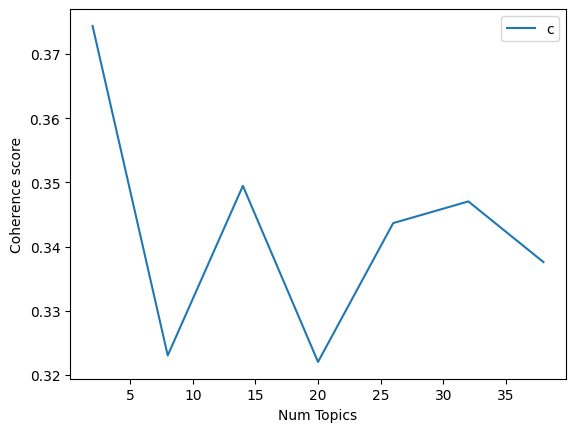

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.3744
Num Topics = 8  has Coherence Value of 0.323
Num Topics = 14  has Coherence Value of 0.3495
Num Topics = 20  has Coherence Value of 0.322
Num Topics = 26  has Coherence Value of 0.3437
Num Topics = 32  has Coherence Value of 0.347
Num Topics = 38  has Coherence Value of 0.3376
